In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
data=pd.read_csv("C:\\Users\\raghu\\Downloads\\bank-additional-full.csv",sep=";")

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
data.shape

(41188, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
data.describe(include = "O").T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(41176, 21)

# outliers

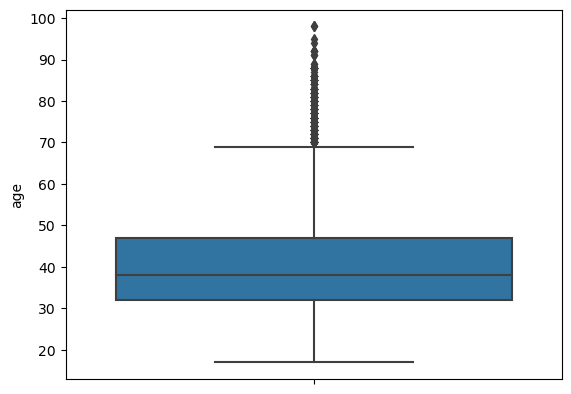

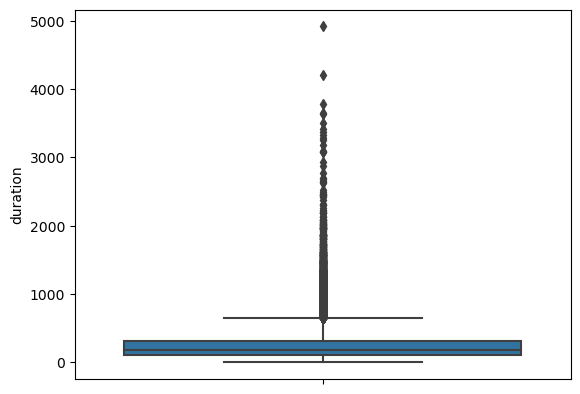

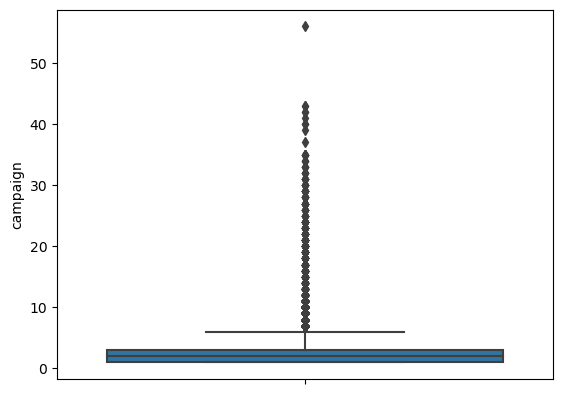

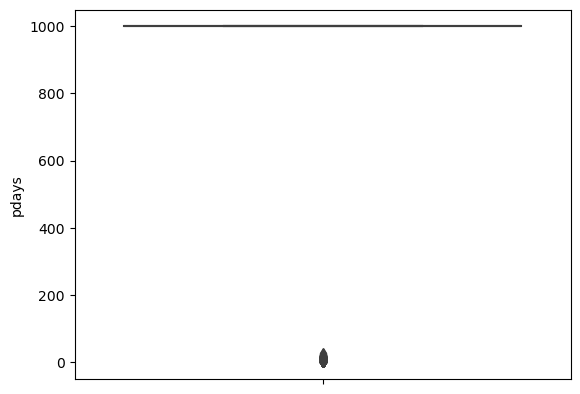

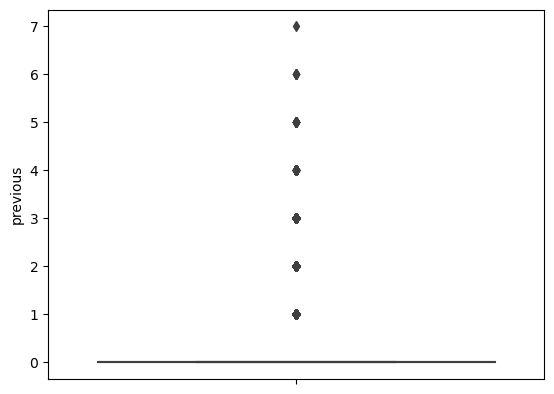

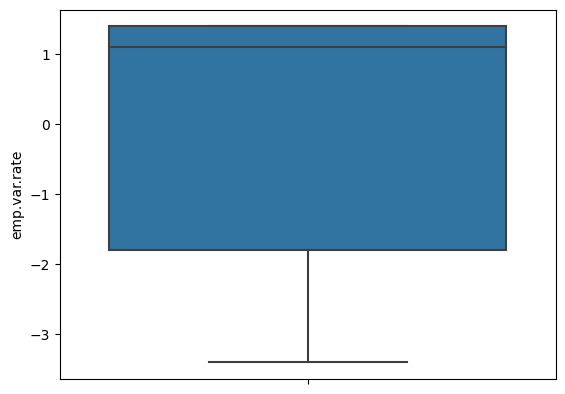

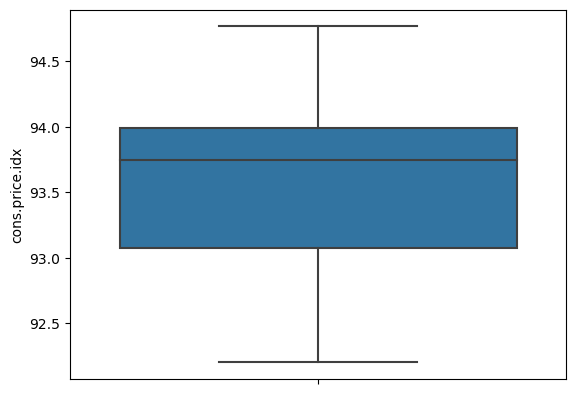

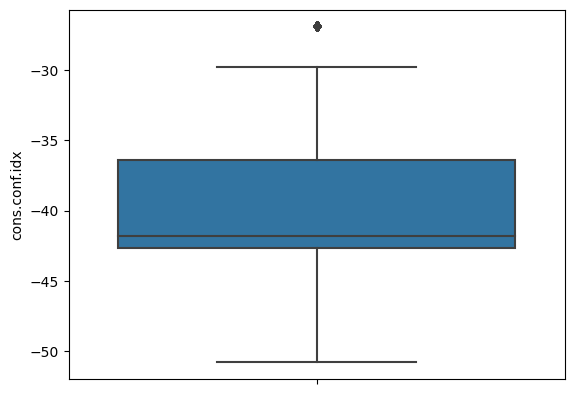

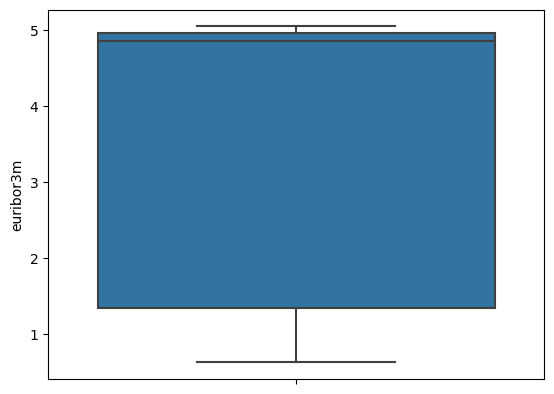

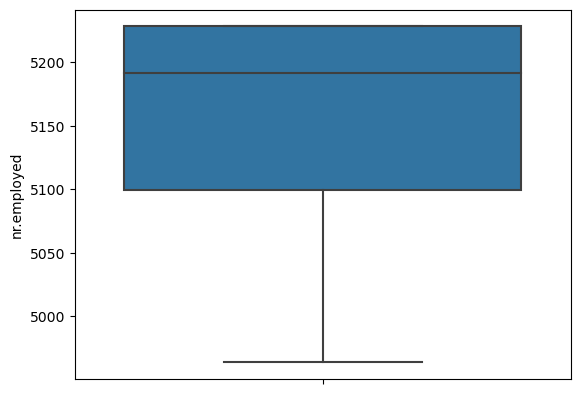

In [14]:
col=data.select_dtypes("number").columns
for i in col:
    sns.boxplot(y=data[i])
    plt.show()

In [15]:
outlier_list = [ "age", "pdays", "campaign", "duration", 'previous']

In [16]:
#eliminating outliers
for col in outlier_list:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    data=data[(data[col]>=lb) & (data[col]<=ub)]

In [17]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


# encoding

In [20]:
col=data.select_dtypes("object").columns

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col:
    data[i]=le.fit_transform(data[i])
    

In [23]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,0,1,6,0,2,0,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0


# Feature selection

<AxesSubplot:>

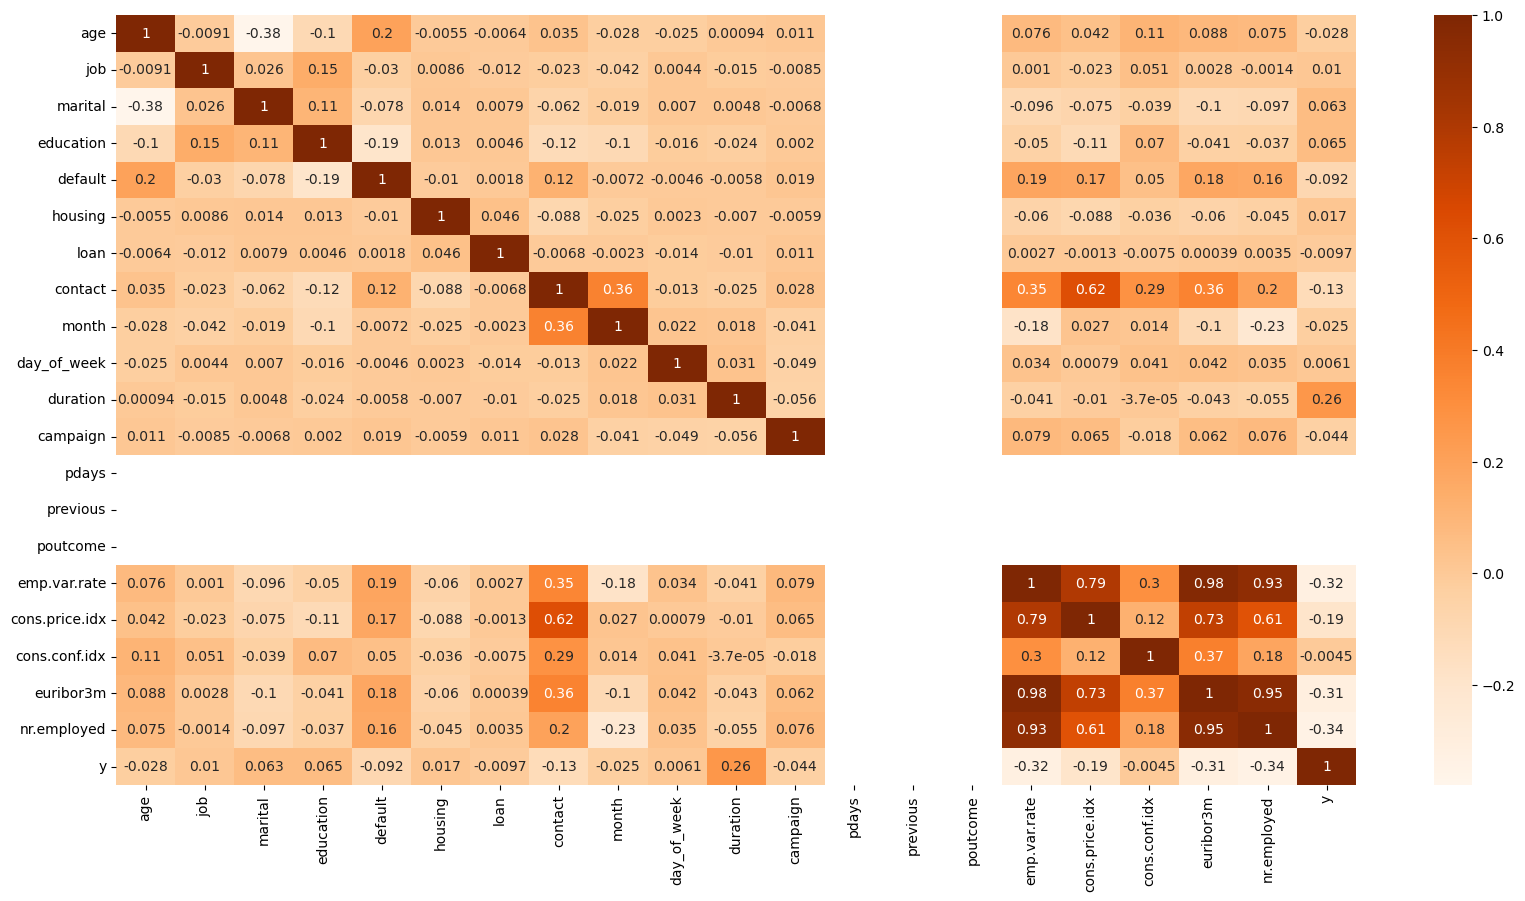

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="Oranges")

In [34]:
#white space is there because only one value is there
#so we remove those columns
data.drop(columns=["pdays","previous","poutcome"],axis=1,inplace=True)

<AxesSubplot:>

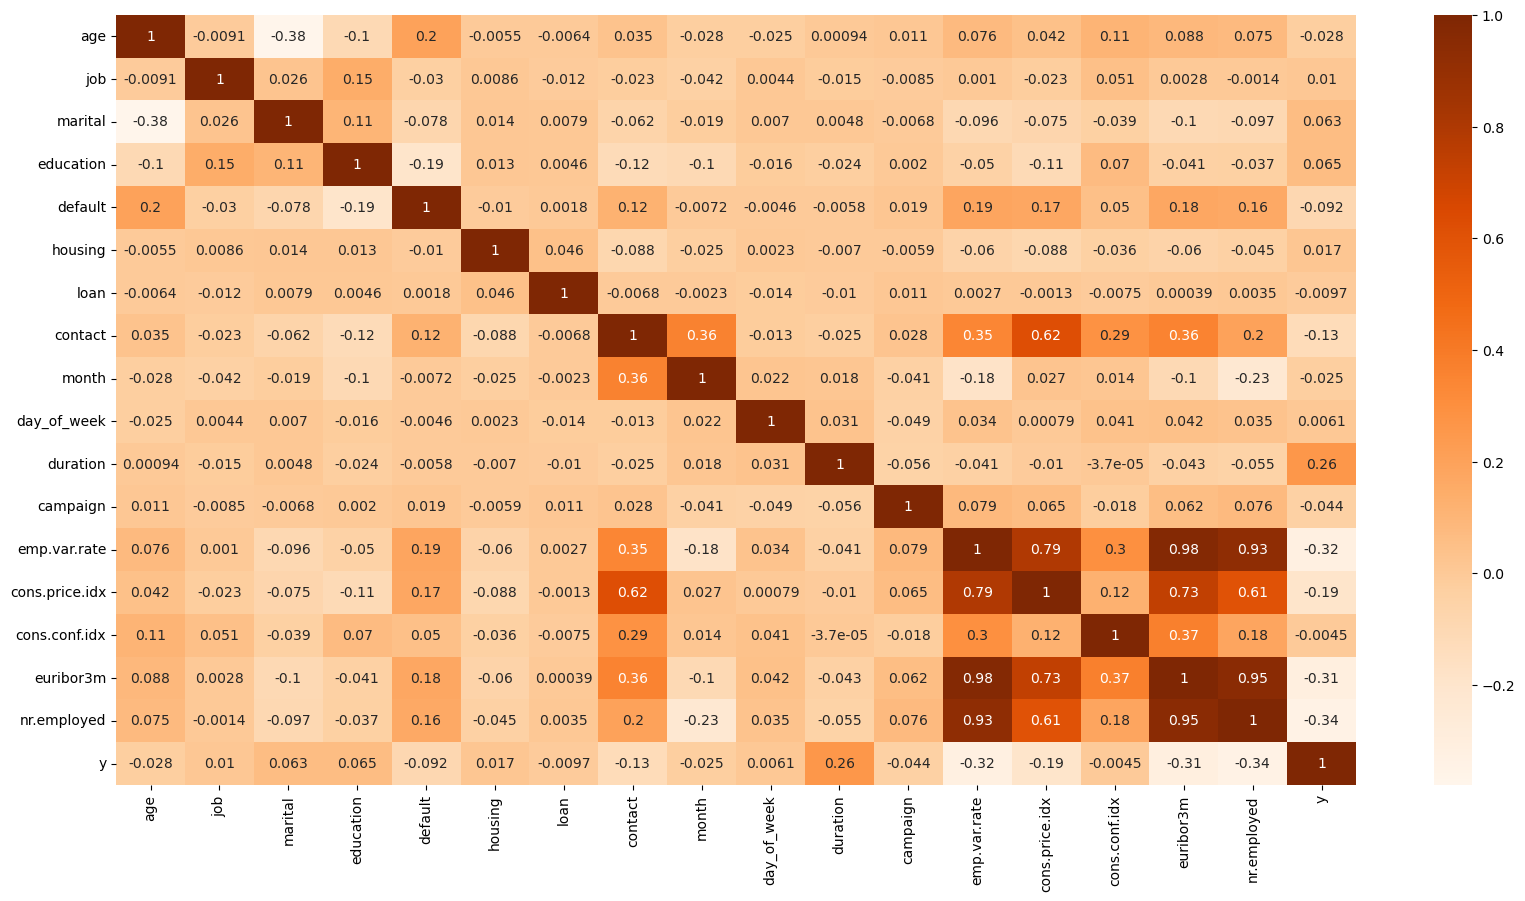

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="Oranges")

# VIF (variance inflation factor)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
#vif is a iterative process

In [58]:
x=data.drop("y",axis=1)

In [53]:
vif_data=pd.DataFrame()

In [59]:
vif_data["features"]=x.columns

In [60]:
vif_data

,features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [66]:
vif_data["vif"]=[VIF(x.values,i) for i in range(len(x.columns))]

In [67]:
vif_data

,features,vif
0,age,22.628556
1,job,2.097040
2,marital,5.624150
3,education,4.469633
4,default,1.435571
5,housing,2.193266
6,loan,1.208261
7,contact,3.528703
8,month,7.940146
9,day_of_week,3.107883


In [68]:
data.drop("nr.employed",axis=1,inplace=True)

In [70]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,261,1,1.1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,6,1,149,1,1.1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,6,1,226,1,1.1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,6,1,151,1,1.1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,6,1,307,1,1.1,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,0,7,0,254,2,-1.1,94.767,-50.8,1.028,0
41181,37,0,1,6,0,2,0,0,7,0,281,1,-1.1,94.767,-50.8,1.028,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,-1.1,94.767,-50.8,1.028,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,-1.1,94.767,-50.8,1.028,0


In [71]:
x=data.drop("y",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["vif"]=[VIF(x.values,i) for i in range(len(x.columns))]

In [72]:
vif_data

,features,vif
0,age,22.628275
1,job,2.097004
2,marital,5.623191
3,education,4.469611
4,default,1.434340
5,housing,2.192605
6,loan,1.208162
7,contact,2.713499
8,month,6.821645
9,day_of_week,3.107170


In [73]:
data.drop("cons.price.idx",axis=1,inplace=True)

In [74]:
x=data.drop("y",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["vif"]=[VIF(x.values,i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,20.779749
1,job,2.088201
2,marital,5.382871
3,education,4.388985
4,default,1.434085
5,housing,2.188113
6,loan,1.207474
7,contact,2.501098
8,month,6.566181
9,day_of_week,3.083520


In [75]:
data.drop("euribor3m",axis=1,inplace=True)

In [76]:
x=data.drop("y",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["vif"]=[VIF(x.values,i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,17.119801
1,job,2.078345
2,marital,5.120565
3,education,4.192829
4,default,1.432551
5,housing,2.178730
6,loan,1.207170
7,contact,2.498981
8,month,5.747449
9,day_of_week,3.036491


In [77]:
data.drop("cons.conf.idx",axis=1,inplace=True)

In [78]:
x=data.drop("y",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["vif"]=[VIF(x.values,i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,9.670038
1,job,2.068648
2,marital,4.121220
3,education,4.049047
4,default,1.432531
5,housing,2.139155
6,loan,1.203825
7,contact,2.476306
8,month,5.364664
9,day_of_week,2.957550


In [79]:
data.drop("age",axis=1,inplace=True)

In [80]:
x=data.drop("y",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["vif"]=[VIF(x.values,i) for i in range(len(x.columns))]
vif_data

,features,vif
0,job,2.027812
1,marital,4.115342
2,education,3.730822
3,default,1.337079
4,housing,2.067229
5,loan,1.199301
6,contact,2.475056
7,month,4.889155
8,day_of_week,2.819008
9,duration,2.818420


In [81]:
x

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261,1,1.1
1,7,1,3,1,0,0,1,6,1,149,1,1.1
2,7,1,3,0,2,0,1,6,1,226,1,1.1
3,0,1,1,0,0,0,1,6,1,151,1,1.1
4,7,1,3,0,0,2,1,6,1,307,1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254,2,-1.1
41181,0,1,6,0,2,0,0,7,0,281,1,-1.1
41184,1,1,5,0,0,0,0,7,0,383,1,-1.1
41185,5,1,6,0,2,0,0,7,0,189,2,-1.1


# model building

In [82]:
X=x

In [83]:
y=data["y"]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [86]:
model=LogisticRegression()

In [87]:
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# evaluation

In [90]:
from sklearn.metrics import *
accuracy_score(y_test,y_pred)

0.9426326129666012

In [91]:
error_rate=1-accuracy_score(y_test,y_pred)
error_rate

0.05736738703339883

In [92]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[7140,   87],
       [ 351,   57]], dtype=int64)

<AxesSubplot:>

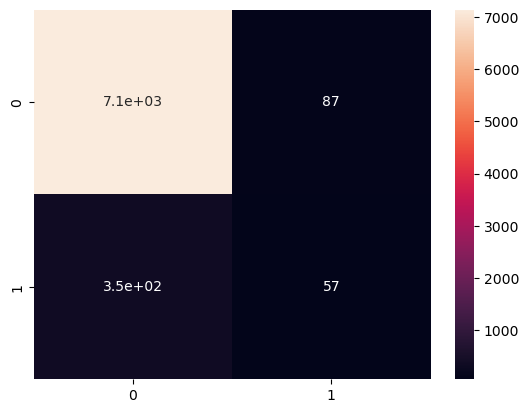

In [94]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,)

In [95]:
#classsification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7227
           1       0.40      0.14      0.21       408

    accuracy                           0.94      7635
   macro avg       0.67      0.56      0.59      7635
weighted avg       0.92      0.94      0.93      7635

